In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [244]:

df = pd.read_excel("all_schedules.xlsx")


df['team'] = df['team'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)

#ignore comments in this cell

# create new column with sorted team names
#df['matchup'] = df.apply(lambda row: '-'.join(sorted([row['team'], row['Opponent']])), axis=1)

# create unique identifier for each matchup
#df['matchup_id'] = df['New Date'].astype(str) + '-' + df['team']

# drop duplicate rows based on matchup_id
#df = df.drop_duplicates(subset='matchup_id')

# drop matchup and matchup_id columns
#df = df.drop(columns=['matchup', 'matchup_id']) #filter out games that are repeated on the same day... do we need to do this?


df

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,35,"Sun,",2023-03-19,CBI,N,Eastern Kentucky,A-Sun,-2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Cleveland St.,cleveland-state,0,2023
57805,31,"Sun,",2023-03-19,CBI,N,Milwaukee,Horizon,-4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Stetson,stetson,0,2023
57806,34,"Sun,",2023-03-19,CBI,N,Tarleton State,WAC,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Radford,radford,0,2023
57807,34,"Sun,",2023-03-19,CBI,N,Duquesne,A-10,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Rice,rice,0,2023


In [245]:
df.head()

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016


In [246]:
team_stats = pd.read_excel("all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [247]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])
merged


,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [248]:
training_set = merged
training_set

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


In [249]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['Opponent'])
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA
training_set.head()

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
193,5,"Thu,",2015-11-26,REG,N,Santa Clara,WCC,-4.67,W,75.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Arizona
204,16,"Sat,",2016-01-09,REG,A,Southern California,Pac-12,13.52,L,101.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Southern California
221,33,"Fri,",2016-03-11,CTOURN,N,Oregon,Pac-12,18.05,L,89.0,...,29.3,52.2,45.7,38.1,31.6,69.1,3.4,R64,6.0,Oregon
435,21,"Thu,",2016-01-21,REG,H,Southern Illinois-Edwardsville,OVC,-10.78,W,90.0,...,31.3,51.0,53.3,34.7,36.4,70.5,-11.3,R64,16.0,Austin Peay
436,22,"Sat,",2016-01-23,REG,H,Eastern Illinois,OVC,-8.35,L,86.0,...,31.3,51.0,53.3,34.7,36.4,70.5,-11.3,R64,16.0,Eastern Illinois


SELECT FEATURES FOR TRAINING SET HERE

In [250]:
training_set = training_set[['team', 'Opponent', "Winner", "W/L","Margin", "SRS", 'Site', "Year", "Type"]]
print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)

training_set.head()

489


,team,Opponent,Winner,W/L,Margin,SRS,Site,Year,Type
0,Arizona,Santa Clara,Arizona,W,2,-4.67,N,2016,REG
1,Arizona,Southern California,Southern California,L,-2,13.52,A,2016,REG
2,Arizona,Oregon,Oregon,L,-6,18.05,N,2016,CTOURN
3,Austin Peay,Southern Illinois-Edwardsville,Austin Peay,W,4,-10.78,H,2016,REG
4,Austin Peay,Eastern Illinois,Eastern Illinois,L,-1,-8.35,H,2016,REG


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [251]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["Opponent"]=encoder.fit_transform(training_set["Opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away



converted_season.head()

,team,Opponent,Winner,W/L,Margin,SRS,Site,Year,Type
0,1,183,Arizona,W,2,-4.67,2,2016,REG
1,1,191,Southern California,L,-2,13.52,0,2016,REG
2,1,155,Oregon,L,-6,18.05,2,2016,CTOURN
3,6,192,Austin Peay,W,4,-10.78,1,2016,REG
4,6,54,Eastern Illinois,L,-1,-8.35,1,2016,REG


In [252]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,Opponent,Winner,W/L,Margin,SRS,Site,Year,Type
0,1,183,1,W,2,-4.67,2,2016,REG
1,1,191,191,L,-2,13.52,0,2016,REG
2,1,155,155,L,-6,18.05,2,2016,CTOURN
3,6,192,6,W,4,-10.78,1,2016,REG
4,6,54,54,L,-1,-8.35,1,2016,REG


In [253]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site,Year,Type
0,1,183,1,2,-4.67,2,2016,REG
1,1,191,191,-2,13.52,0,2016,REG
2,1,155,155,-6,18.05,2,2016,CTOURN
3,6,192,6,4,-10.78,1,2016,REG
4,6,54,54,-1,-8.35,1,2016,REG


In [254]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,Opponent,Winner,Margin,SRS,Site,Year,Type,team_game_win
0,1,183,1,2,-4.67,2,2016,REG,2.0
1,1,191,191,-2,13.52,0,2016,REG,1.0
2,1,155,155,-6,18.05,2,2016,CTOURN,1.0
3,6,192,6,4,-10.78,1,2016,REG,2.0
4,6,54,54,-1,-8.35,1,2016,REG,1.0


CORRELATION MATRIX


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\divys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


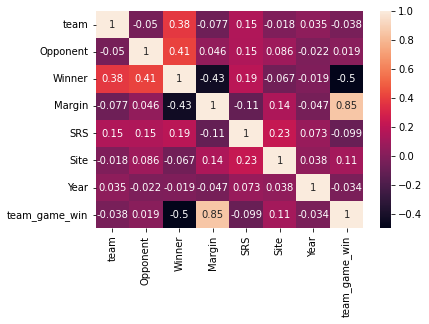

In [255]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

FEATURES ARE NOT THAT CORREALTED EXCEPT FOR MARGIN AND TEAM_GAME_WIN... MAY NEED TO ADD DIFFERENT STATISTICS

TRAINING DATA will be set to entire 2016 season and testing data will be set to 2017 NCAA tournament games

In [256]:
training_set = converted_season.loc[converted_season["Year"] == 2016] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == 2017) & (converted_season["Type"] == "NCAA")] # testing set

training_set = training_set.drop(["Year", "Type"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values


print(len(X_train))
print(len(X_test))
print(X_train)
training_set


115
2
[[ 1.000e+00  1.830e+02  1.000e+00  2.000e+00 -4.670e+00  2.000e+00]
 [ 1.000e+00  1.910e+02  1.910e+02 -2.000e+00  1.352e+01  0.000e+00]
 [ 1.000e+00  1.550e+02  1.550e+02 -6.000e+00  1.805e+01  2.000e+00]
 [ 6.000e+00  1.920e+02  6.000e+00  4.000e+00 -1.078e+01  1.000e+00]
 [ 6.000e+00  5.400e+01  5.400e+01 -1.000e+00 -8.350e+00  1.000e+00]
 [ 6.000e+00  2.060e+02  2.060e+02 -1.000e+00 -5.570e+00  1.000e+00]
 [ 6.000e+00  1.400e+01  6.000e+00  1.000e+00  1.190e+00  2.000e+00]
 [ 7.000e+00  9.200e+01  7.000e+00  7.000e+00  1.231e+01  1.000e+00]
 [ 7.000e+00  8.700e+01  7.000e+00  9.000e+00  1.693e+01  1.000e+00]
 [ 1.100e+01  2.700e+01  1.100e+01  2.000e+00 -5.620e+00  1.000e+00]
 [ 1.100e+01  1.470e+02  1.470e+02 -7.000e+00  1.900e+00  0.000e+00]
 [ 1.500e+01  2.420e+02  1.500e+01  6.000e+00  9.000e-02  0.000e+00]
 [ 1.500e+01  2.320e+02  2.320e+02 -1.000e+00  2.204e+01  0.000e+00]
 [ 1.500e+01  2.250e+02  2.250e+02 -4.000e+00  1.550e+01  2.000e+00]
 [ 1.600e+01  6.900e+01  1.6

,team,Opponent,Winner,Margin,SRS,Site,team_game_win
0,1,183,1,2,-4.67,2,2.0
1,1,191,191,-2,13.52,0,1.0
2,1,155,155,-6,18.05,2,1.0
3,6,192,6,4,-10.78,1,2.0
4,6,54,54,-1,-8.35,1,1.0
...,...,...,...,...,...,...,...
110,40,170,170,-5,7.92,0,1.0
111,58,10,58,7,0.15,1,2.0
112,78,93,93,-3,23.87,0,1.0
113,81,234,81,5,5.53,1,2.0


In [257]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train

array([[2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [258]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [259]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(X_train,Y_train)

C:\Users\divys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [260]:
Y_pred=svm_clf.predict(X_test)
print("Acurracy of our model is :")
accuracy_score(Y_test,Y_pred)

Acurracy of our model is :


0.5

In [261]:
Y_test

array([[2.],
       [1.]])

In [262]:
Y_pred

array([2., 2.])